<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-model" data-toc-modified-id="Import-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import model</a></span></li><li><span><a href="#Import-new-audio" data-toc-modified-id="Import-new-audio-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import new audio</a></span></li><li><span><a href="#Extract-features" data-toc-modified-id="Extract-features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extract features</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prediction</a></span></li></ul></div>

In [1]:
from keras.models import load_model
from keras.utils import np_utils
import pandas as pd
import librosa
import numpy as np
import os
import scipy
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Import model

In [2]:
new_model = load_model('Output/final_ost_model.h5')

# Import new audio

In [86]:
directory = "data_to_predict"
for song in os.listdir(directory):
        song_path = f"{directory}/{song}"
        if song == ".DS_Store":
            continue
        print(song_path)

data_to_predict/04_horr_Trailed by Horror - Trailer Worx.wav
data_to_predict/02_adv_The Unexplored - Philip Ayers.wav
data_to_predict/01_act_Machiavellian - Wendel Scherer.wav
data_to_predict/05_tragd_So Lonely - Rachel Meyer.wav
data_to_predict/03_hap_A Love That Once Belonged - Claude Signet.wav


In [147]:

def gen_audio(song_path, window = 15,overlap=0.25):
        y, sr = librosa.load(song_path)
        duration = True
        i=0
        while duration:
            #print(song_path)
            song_points = len(y)
            window_points = window*sr
            start = int(i*window_points - overlap*window_points)
            if start<0:
                start=0
            end = start + window_points
            #print(start,end)
            sample=y[start:end]
            if end >= song_points:
                #print("-")
                sample = y[-window_points:]
                duration = False
            i += 1
            yield sample,sr

In [148]:
samples = list(gen_audio("data_to_predict/02_adv_The Unexplored - Philip Ayers.wav"))

In [142]:
#samples = [librosa.load("data_to_predict/03_hap_A Love That Once Belonged - Claude Signet.wav")]

In [143]:
len(samples)

10

In [149]:
import IPython.display as ipd
ipd.Audio(samples[0][0], rate=samples[0][1])

# Extract features

In [70]:
#audio_gen = gen_audio()

In [91]:
def feature_extract(audio_generator = audio_gen):
    predict = pd.DataFrame()
    i = 1
    for sample, sr in audio_generator:
        y = sample
        zero_crossing = librosa.zero_crossings(y=y, pad=False)
        #spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        #spectral_band_width = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        #spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        #tonal_centroid = librosa.feature.tonnetz(y=y, sr=sr)
        #onset_strength = librosa.onset.onset_strength(y=y, sr=sr)
        #plp = librosa.beat.plp(onset_envelope=onset_strength, sr=sr)
        #beats = librosa.beat.beat_track(y=y, sr=sr)
        #fft = scipy.fft.fft(y)
        predict = predict.append({
            #"label":label,
            "sample":sample,
            "sr":sr,
            "zero_crossings": sum(zero_crossing),
            #"spectral_centroid": np.mean(spectral_centroid),
            #"spectral_band_width": np.mean(spectral_band_width),
            #"spectral_rolloff" : np.mean(spectral_rolloff),
            "chroma_stft": [np.mean(c) for c in chroma_stft],
            "mfcc": [np.mean(e) for e in mfcc],
            #"tonal_centroid": [np.mean(t) for t in chroma_stft],
            #"onset_strength" : np.mean(onset_strength),
            #"plp" : np.mean(plp),
            #"beats" : np.mean(np.mean(beats)),
            #"fft" : np.mean([float(f) for f in fft])
        }, ignore_index=True)
        print(i,end="\r")
        print(predict.shape)
        i+=1
    predict[['chroma_stft1','chroma_stft2','chroma_stft3','chroma_stft4','chroma_stft5','chroma_stft6','chroma_stft7','chroma_stft8','chroma_stft9','chroma_stft10','chroma_stft11','chroma_stft12']] = pd.DataFrame(predict.chroma_stft.tolist(), index= predict.index)
    predict = predict.drop(['chroma_stft'], axis=1)
    predict[['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']] = pd.DataFrame(predict.mfcc.tolist(), index= predict.index)
    predict = predict.drop(['mfcc'], axis=1)
    #predict[['tc1','tc2','tc3','tc4','tc5','tc6','tc7','tc8','tc9','tc10','tc11','tc12']] = pd.DataFrame(predict.tonal_centroid.tolist(), index= predict.index)
    #predict = predict.drop(['tonal_centroid'], axis=1)
    return predict

In [150]:
pr = feature_extract(samples)

(1, 5)
(2, 5)
(3, 5)
(4, 5)
(5, 5)
(6, 5)
(7, 5)
(8, 5)
(9, 5)
(10, 5)


# Prediction

In [151]:
pr = pr.drop(['sample','sr'],axis=1)

In [152]:
X = pr
X

,zero_crossings,chroma_stft1,chroma_stft2,chroma_stft3,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,chroma_stft12,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,10363.0,0.346356,0.290217,0.405792,0.499919,0.671961,0.477865,0.318069,0.305569,0.250252,0.208972,0.311896,0.584999,-203.162231,145.368454,6.130352,37.028149,9.946806,13.508076,-0.274863,11.550385,4.427800,5.239542,-0.225238,1.405856,-2.198082,1.425573,-1.799612,4.298216,0.516582,2.542730,-1.526681,0.133568
1,12791.0,0.274954,0.278487,0.420557,0.454400,0.584289,0.410177,0.339592,0.340458,0.234693,0.266611,0.264057,0.519557,-184.142166,138.950592,6.967731,33.548103,6.074324,15.545790,-0.555622,10.039221,2.966155,4.066646,0.112084,2.896889,-2.492038,0.421947,-3.050845,5.192325,1.672193,5.878910,0.217253,1.359694
2,13776.0,0.386637,0.395947,0.548076,0.474064,0.503250,0.373643,0.356612,0.405102,0.330901,0.534953,0.316955,0.383747,-167.458755,138.474121,4.845524,36.667999,4.315928,9.422625,-0.580855,14.081741,5.420449,5.721437,-2.817383,-1.828820,-4.912582,-0.009519,-1.805228,5.001846,1.267415,5.221356,-2.479329,-0.209735
3,34232.0,0.382346,0.309635,0.450757,0.422685,0.622858,0.343355,0.371734,0.378200,0.266882,0.360671,0.312174,0.548028,-145.109909,100.994400,-9.303335,24.805790,-5.924339,3.481405,-3.683462,10.834669,0.995293,8.868735,1.516414,6.041988,0.053695,3.889017,-0.972982,5.790496,-1.639613,3.500455,-3.706547,1.048898
4,14731.0,0.297573,0.313557,0.446755,0.512192,0.691604,0.452085,0.340727,0.299534,0.284033,0.318829,0.318171,0.475601,-165.639404,135.759521,1.711426,36.163795,7.948093,11.868517,-1.624805,11.799522,1.162563,5.899502,-0.105214,0.301887,-2.639107,-0.430286,-5.284794,2.268672,-0.830868,2.568878,-3.071355,1.046905
5,13740.0,0.519751,0.483686,0.512672,0.430010,0.441686,0.301394,0.451778,0.539963,0.390370,0.502784,0.352761,0.448261,-143.468781,141.043045,-4.001029,42.183334,6.201442,9.555615,-1.862859,10.240274,-0.643294,4.047133,-3.002540,-1.139541,-2.955229,1.420804,-1.321046,4.502433,0.548312,5.349938,0.382831,3.653418
6,23874.0,0.390799,0.399855,0.455222,0.355387,0.488333,0.289972,0.567652,0.410022,0.278532,0.436307,0.317152,0.541544,-124.659103,118.389389,-15.137036,33.719662,-6.396081,2.450144,-7.763084,4.468492,-6.213140,3.578836,-2.506906,1.894065,-3.129454,0.837333,-1.157484,6.462689,-1.800063,4.577603,0.949640,7.133414
7,22662.0,0.378735,0.372074,0.493828,0.362510,0.531199,0.283715,0.474866,0.514533,0.295796,0.364824,0.254695,0.451605,-86.419830,132.487961,-16.060215,38.985432,-0.539232,3.712581,-4.703156,9.275352,-3.600326,5.398276,-5.658157,0.393578,-3.514342,2.955922,-1.460106,2.878870,-2.779771,4.758916,0.547433,2.879943
8,27088.0,0.211261,0.229167,0.364457,0.323731,0.641473,0.321586,0.488103,0.371640,0.210047,0.287523,0.214358,0.379054,-59.855698,115.349625,-13.323085,37.877563,-4.150755,3.894334,-6.297715,7.979753,-5.887736,5.756469,-3.104851,1.171188,-6.621602,-0.644554,-3.661318,2.970636,-3.261775,3.010854,-0.738986,4.429259
9,39734.0,0.260177,0.283294,0.389756,0.480873,0.808185,0.433788,0.484403,0.328716,0.256024,0.386671,0.347583,0.428933,-171.691269,82.681717,-12.894580,31.284159,-3.540890,3.241198,-4.106821,4.340573,-6.514708,4.074943,-1.213981,0.293397,-5.850559,0.116287,-1.769039,2.088108,-1.706460,1.499572,-2.555162,2.571887


In [153]:
# Scale variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [154]:
pred = new_model.predict(X)
pred

array([[1.94345519e-01, 6.23948537e-02, 2.50039417e-02, 5.95633686e-01,
        1.22621998e-01],
       [4.45945625e-05, 3.51314293e-03, 1.94568851e-03, 2.61170848e-04,
        9.94235456e-01],
       [1.75627938e-03, 7.67327189e-01, 1.90888867e-02, 1.80427860e-02,
        1.93784893e-01],
       [1.80208668e-01, 7.90663838e-01, 1.74724292e-02, 7.57408049e-03,
        4.08090558e-03],
       [1.28432848e-02, 7.10267527e-03, 3.58507736e-03, 9.64717805e-01,
        1.17511209e-02],
       [1.03482125e-04, 9.68927860e-01, 8.80512453e-05, 1.45499609e-04,
        3.07351537e-02],
       [1.19793294e-02, 9.61093962e-01, 1.33376084e-02, 5.26867062e-03,
        8.32045451e-03],
       [3.24178516e-04, 5.55140711e-03, 9.93386090e-01, 1.22897240e-04,
        6.15386351e-04],
       [2.10043858e-04, 4.01140004e-03, 9.95603561e-01, 2.65494127e-05,
        1.48434483e-04],
       [3.06467973e-02, 2.00103492e-01, 6.12218857e-01, 7.90696666e-02,
        7.79611468e-02]], dtype=float32)

In [155]:
genre_list = ['Action', 'Adventure', 'Happy', 'Horror', 'Tragedy']

In [156]:
genre_list[np.argmax(pred[0])]

'Horror'

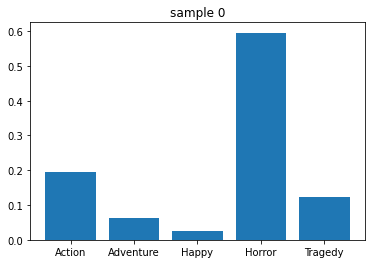

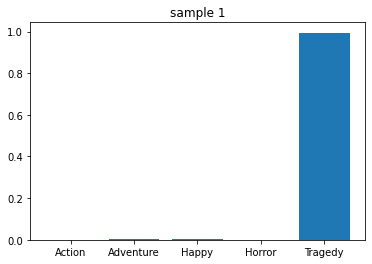

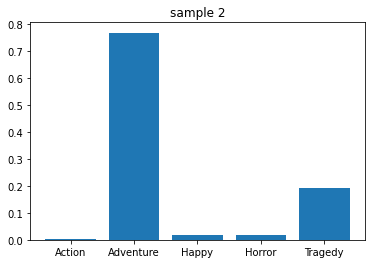

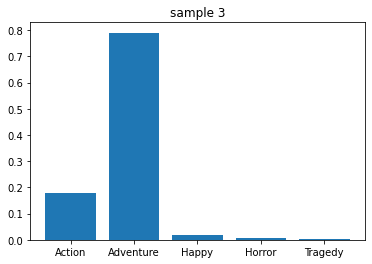

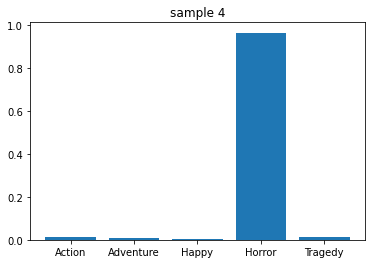

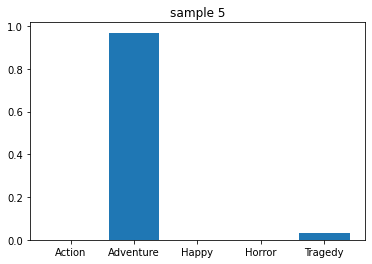

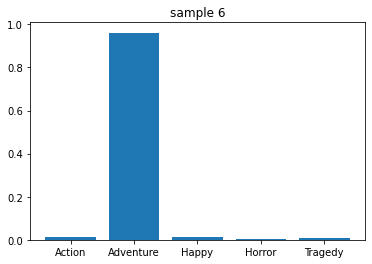

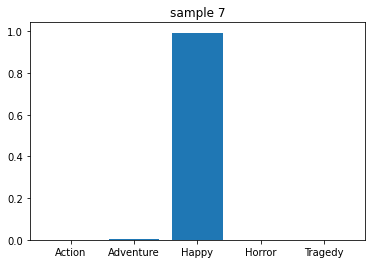

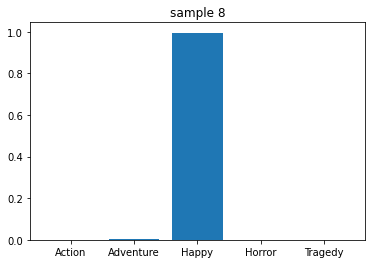

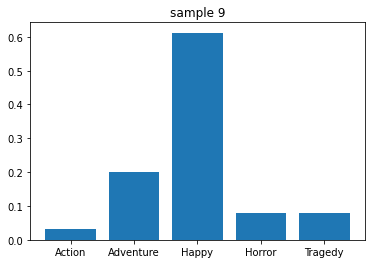

In [161]:
import matplotlib.pyplot as plt
for i, prediction_sample in enumerate(pred):
    plt.figure()
    plt.bar(genre_list,prediction_sample)
    plt.title(f"sample {i}")
    plt.savefig(f"output/avd_sample_{i}.svg")

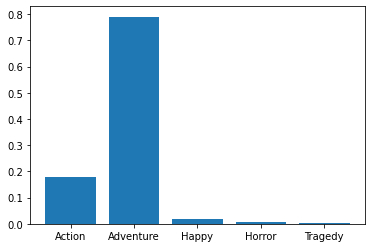

In [165]:
sample_num = 3
plt.bar(genre_list,pred[sample_num])
ipd.Audio(samples[sample_num][0], rate=samples[sample_num][1])

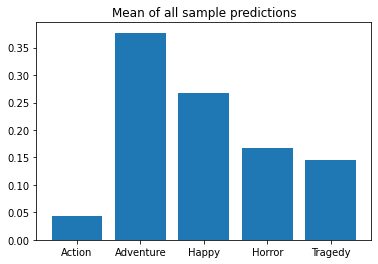

In [160]:
plt.bar(genre_list,np.mean(pred, axis=0))
plt.title("Mean of all sample predictions")
plt.savefig("output/avd_mean.svg")

In [166]:
suma = np.sum(pred, axis=0)
suma /= np.max(suma)
suma

array([0.11469048, 1.        , 0.7112042 , 0.44311863, 0.3830214 ],
      dtype=float32)

<BarContainer object of 5 artists>

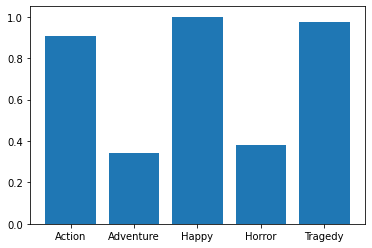

In [140]:
plt.bar(genre_list,suma)

In [139]:
sum(suma)

3.603833258152008

In [138]:
sum(np.mean(pred, axis=0))

1.000000037252903